# Five Personality Traits (OCEAN)


Kaggle link: https://www.kaggle.com/code/akdagmelih/five-personality-clusters-k-means/notebook


Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)

1280px-Wiki-grafik_peats-de_big_five_ENG.png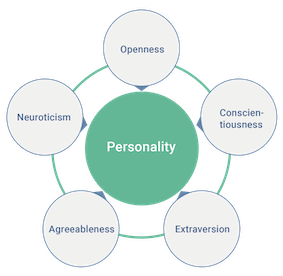

This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. 

The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can find more info about each question in the data set link.

In this study I will analyse the data set and use unsupervised learning algorithm K-Means Clustering for clustering the participants.

Resources:
https://en.wikipedia.org/wiki/Big_Five_personality_traits
https://ipip.ori.org/newBigFive5broadKey.htm
https://www.kaggle.com/tunguz/big-five-personality-test

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Data Set

In [4]:
data_raw = pd.read_csv("../data-final.csv", sep="\t")
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print("Number of participants: ", len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


## Understanding the Data Set

In [5]:
print("Is there any missing value? ", data.isnull().values.any())
print("How many missing values? ", data.isnull().values.sum())
data.dropna(inplace=True)
print("Number of participants after eliminating missing values: ", len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


Text(0, 0.5, 'Participants')

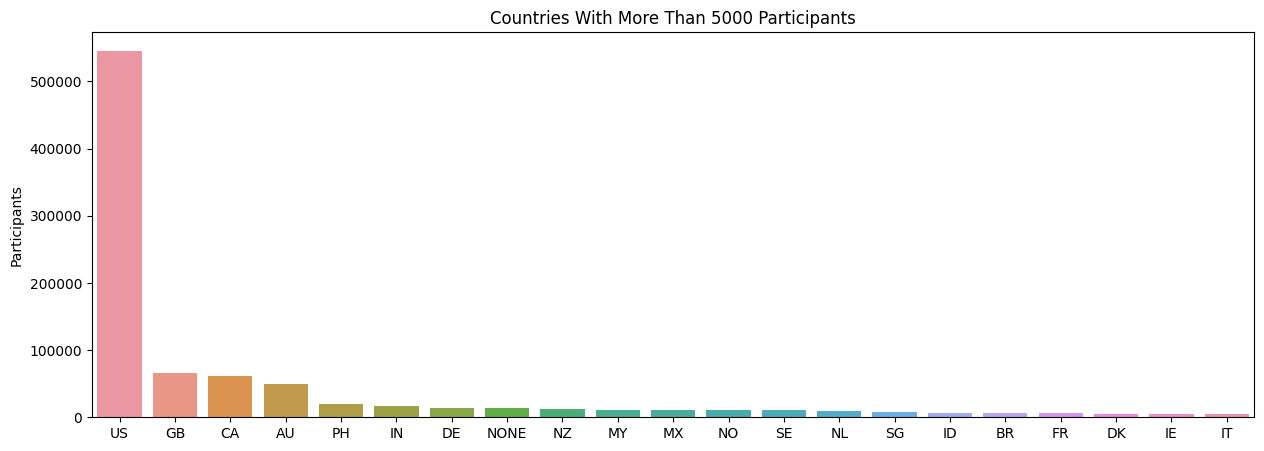

In [6]:
# Participants' nationality distriution
countries = pd.DataFrame(data["country"].value_counts())
countries_5000 = countries[countries["country"] >= 5000]
plt.figure(figsize=(15, 5))
sns.barplot(data=countries_5000, x=countries_5000.index, y="country")
plt.title("Countries With More Than 5000 Participants")
plt.ylabel("Participants")

In [7]:
# Groups and Questions
ext_questions = {
    "EXT1": "I am the life of the party",
    "EXT2": "I dont talk a lot",
    "EXT3": "I feel comfortable around people",
    "EXT4": "I keep in the background",
    "EXT5": "I start conversations",
    "EXT6": "I have little to say",
    "EXT7": "I talk to a lot of different people at parties",
    "EXT8": "I dont like to draw attention to myself",
    "EXT9": "I dont mind being the center of attention",
    "EXT10": "I am quiet around strangers",
}

est_questions = {
    "EST1": "I get stressed out easily",
    "EST2": "I am relaxed most of the time",
    "EST3": "I worry about things",
    "EST4": "I seldom feel blue",
    "EST5": "I am easily disturbed",
    "EST6": "I get upset easily",
    "EST7": "I change my mood a lot",
    "EST8": "I have frequent mood swings",
    "EST9": "I get irritated easily",
    "EST10": "I often feel blue",
}

agr_questions = {
    "AGR1": "I feel little concern for others",
    "AGR2": "I am interested in people",
    "AGR3": "I insult people",
    "AGR4": "I sympathize with others feelings",
    "AGR5": "I am not interested in other peoples problems",
    "AGR6": "I have a soft heart",
    "AGR7": "I am not really interested in others",
    "AGR8": "I take time out for others",
    "AGR9": "I feel others emotions",
    "AGR10": "I make people feel at ease",
}

csn_questions = {
    "CSN1": "I am always prepared",
    "CSN2": "I leave my belongings around",
    "CSN3": "I pay attention to details",
    "CSN4": "I make a mess of things",
    "CSN5": "I get chores done right away",
    "CSN6": "I often forget to put things back in their proper place",
    "CSN7": "I like order",
    "CSN8": "I shirk my duties",
    "CSN9": "I follow a schedule",
    "CSN10": "I am exacting in my work",
}

opn_questions = {
    "OPN1": "I have a rich vocabulary",
    "OPN2": "I have difficulty understanding abstract ideas",
    "OPN3": "I have a vivid imagination",
    "OPN4": "I am not interested in abstract ideas",
    "OPN5": "I have excellent ideas",
    "OPN6": "I do not have a good imagination",
    "OPN7": "I am quick to understand things",
    "OPN8": "I use difficult words",
    "OPN9": "I spend time reflecting on things",
    "OPN10": "I am full of ideas",
}

# Group Names and Columns
EXT = [column for column in data if column.startswith("EXT")]
EST = [column for column in data if column.startswith("EST")]
AGR = [column for column in data if column.startswith("AGR")]
CSN = [column for column in data if column.startswith("CSN")]
OPN = [column for column in data if column.startswith("OPN")]


In [8]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40, 60))
    for i in range(1, 11):
        plt.subplot(10, 5, i)
        plt.hist(data[groupname[i - 1]], bins=14, color=color, alpha=0.5)
        plt.title(questions[groupname[i - 1]], fontsize=18)

Q&As Related to Extroversion Personality


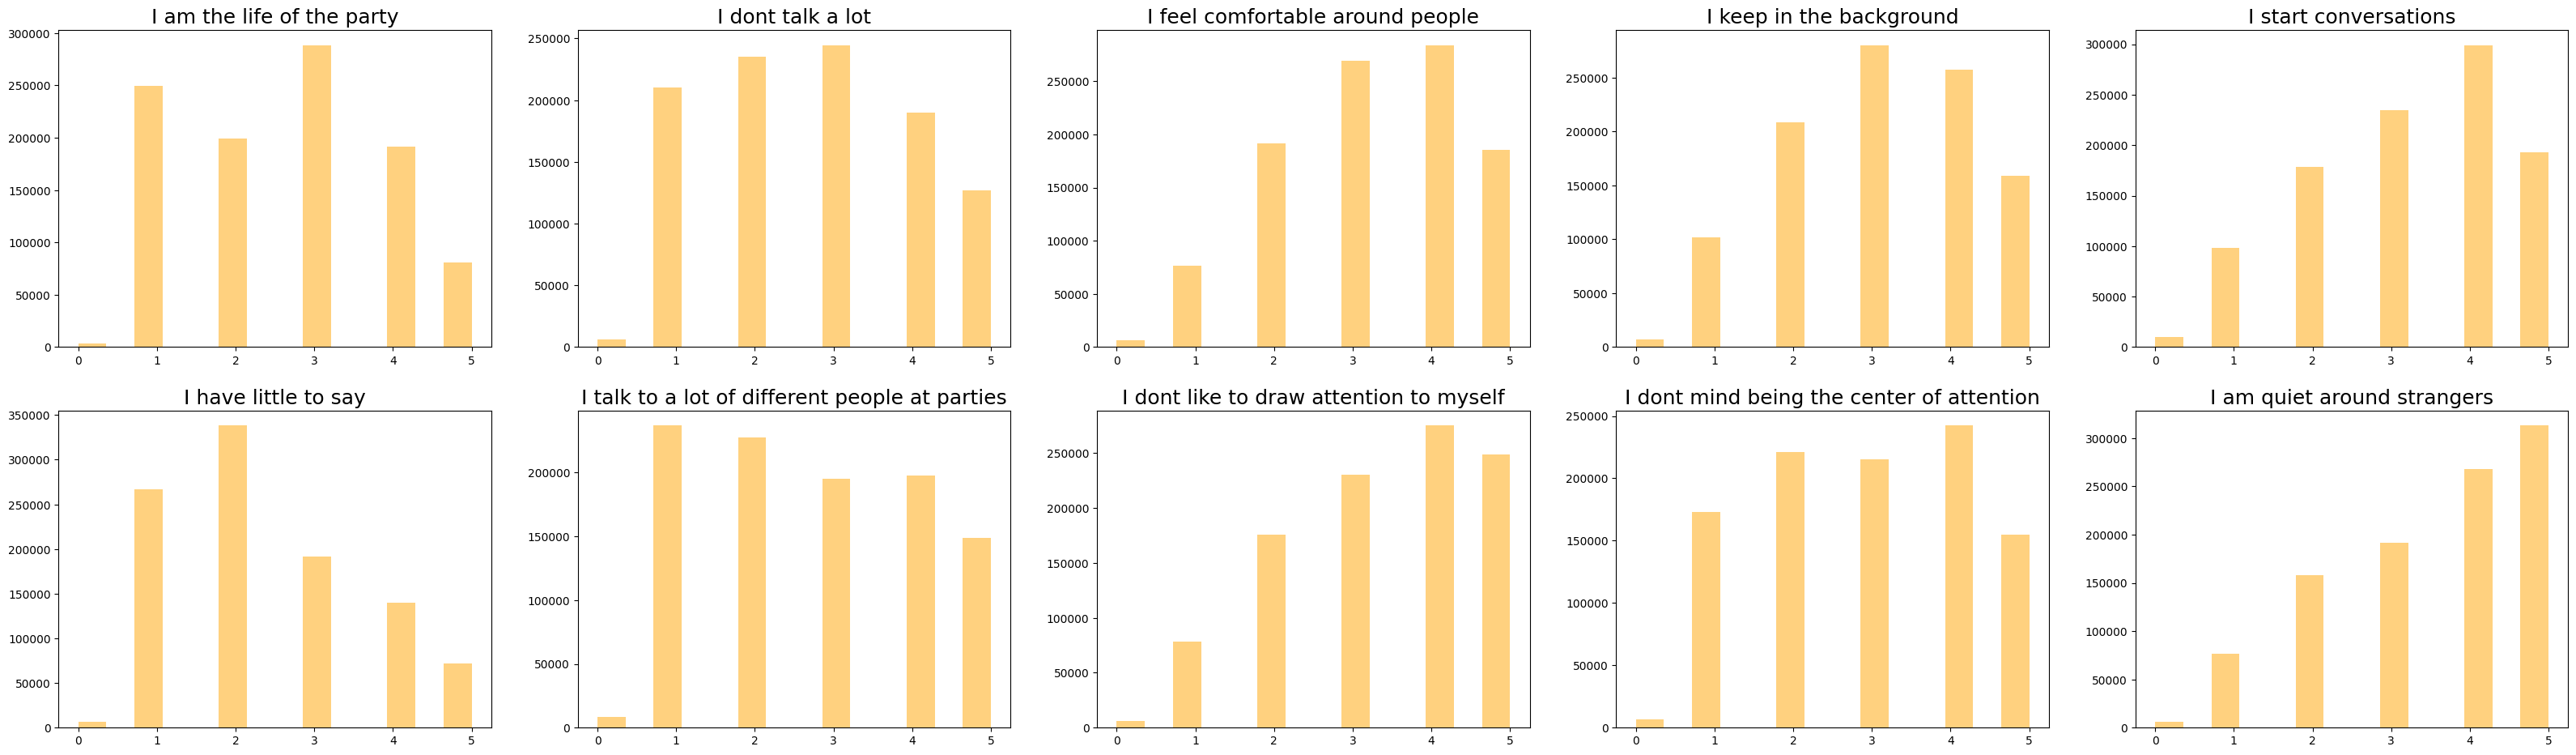

In [9]:
print("Q&As Related to Extroversion Personality")
vis_questions(EXT, ext_questions, "orange")

Q&As Related to Neuroticism Personality


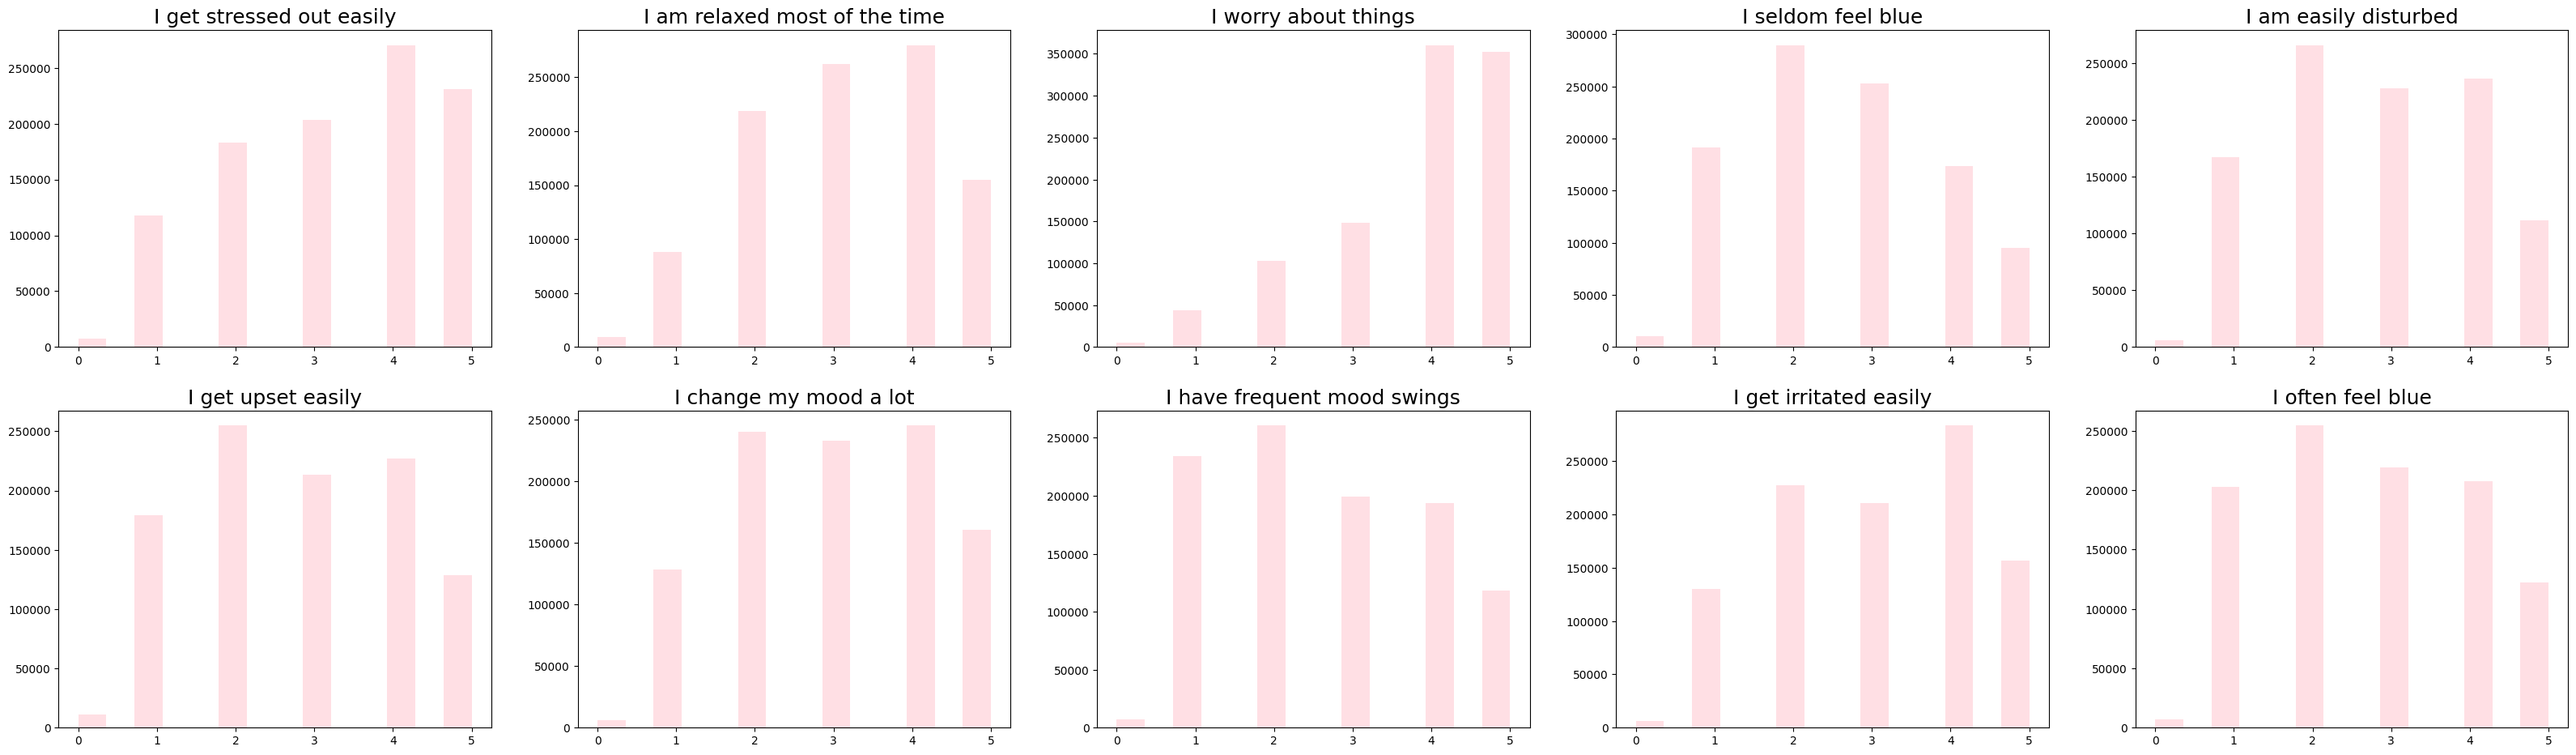

In [10]:
print("Q&As Related to Neuroticism Personality")
vis_questions(EST, est_questions, "pink")

Q&As Related to Agreeable Personality


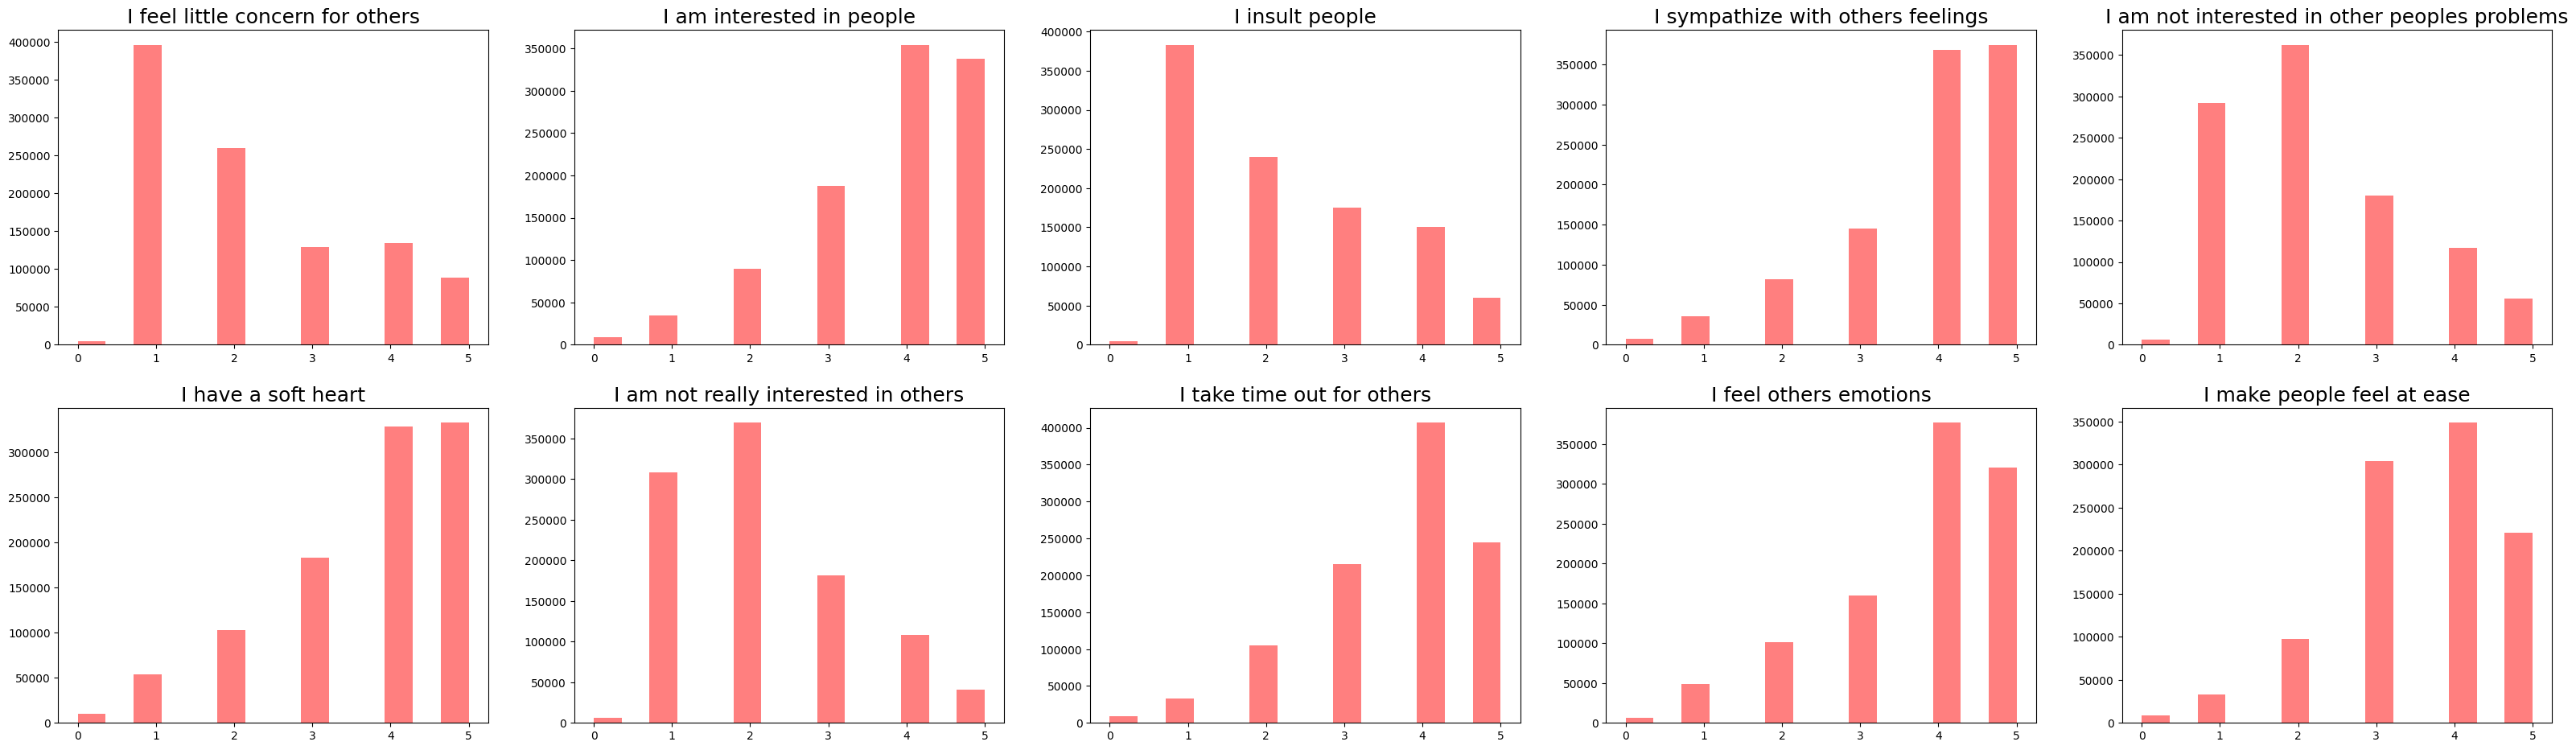

In [11]:
print("Q&As Related to Agreeable Personality")
vis_questions(AGR, agr_questions, "red")

Q&As Related to Conscientious Personality


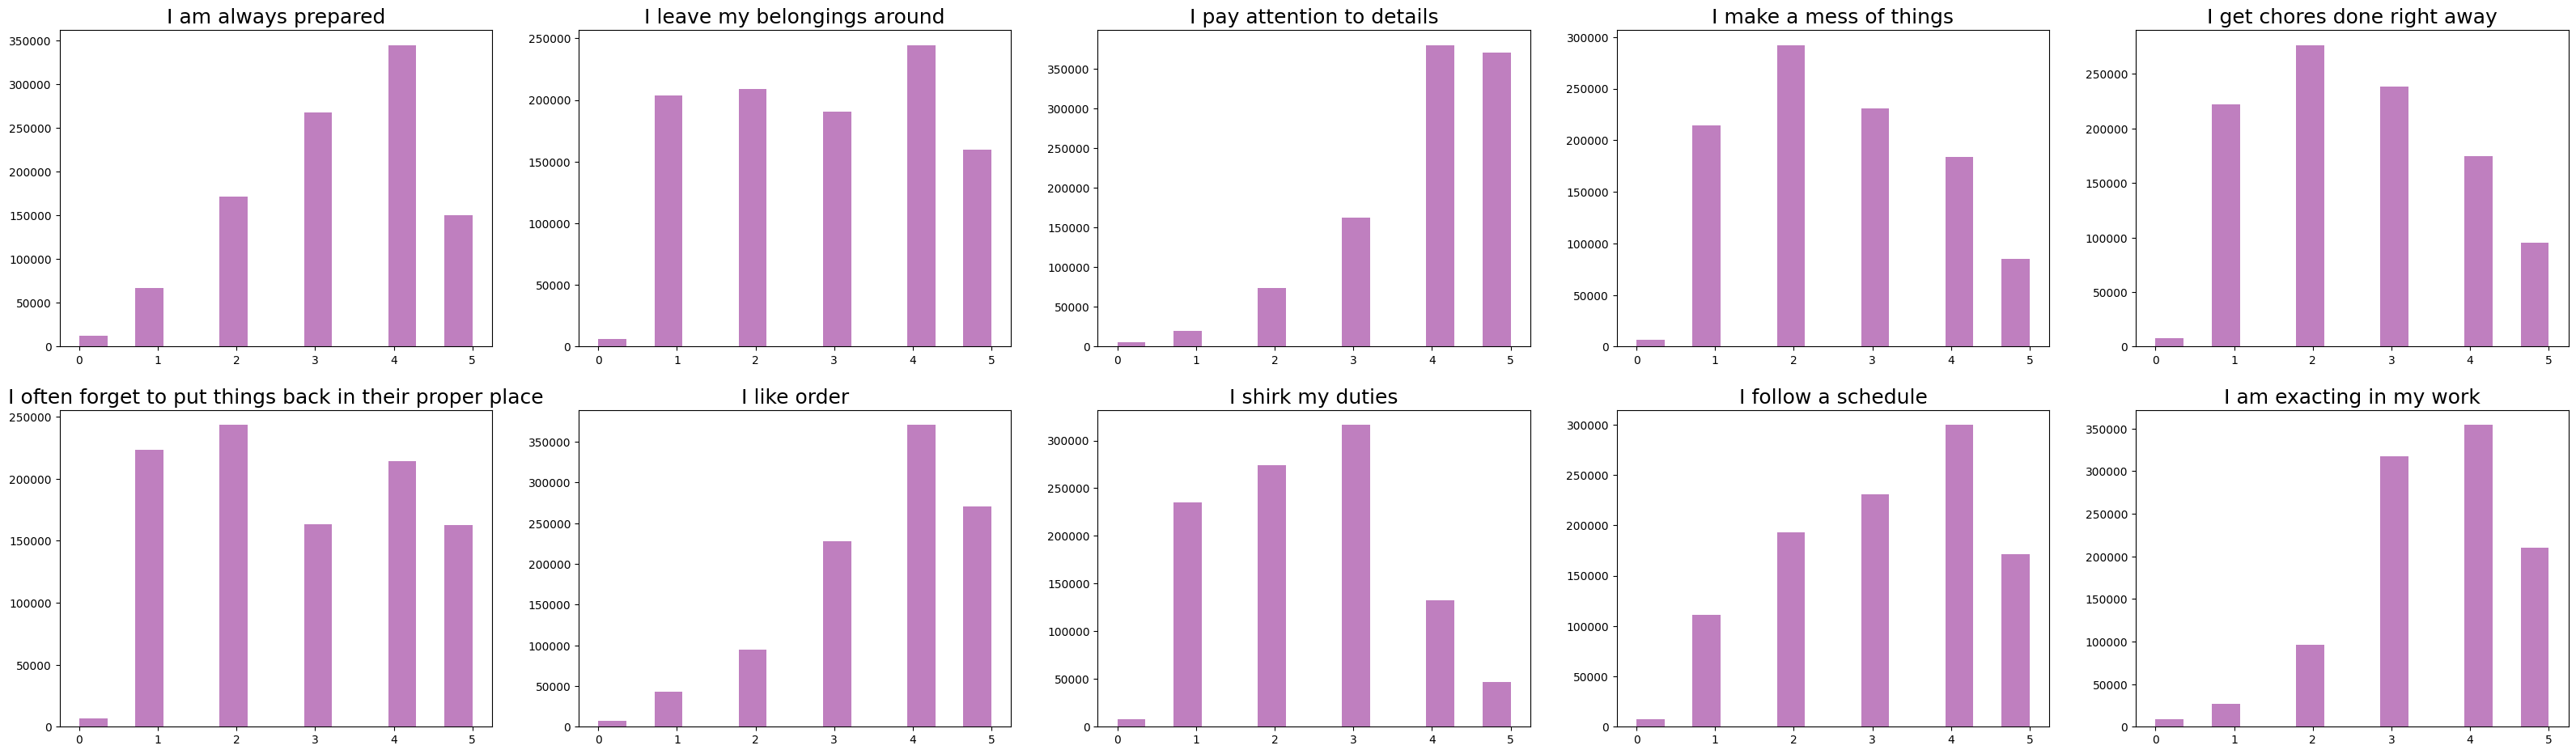

In [12]:
print("Q&As Related to Conscientious Personality")
vis_questions(CSN, csn_questions, "purple")

Q&As Related to Open Personality


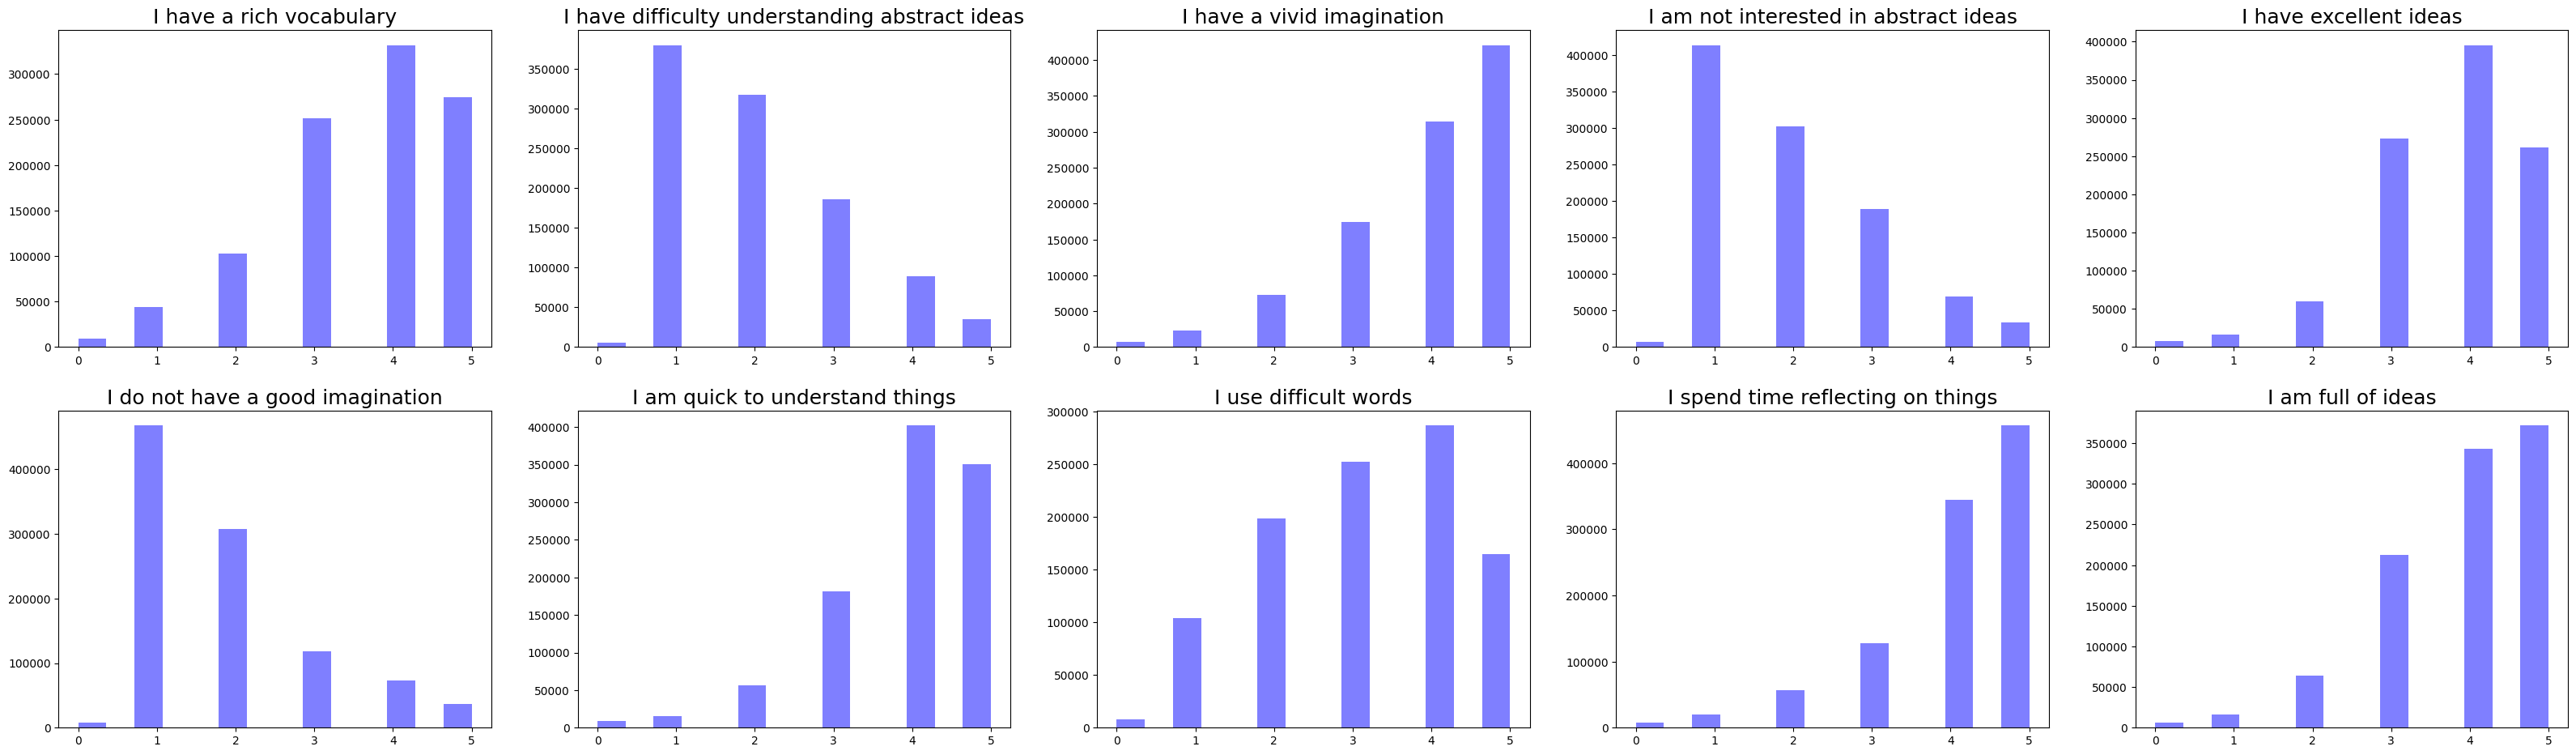

In [13]:
print("Q&As Related to Open Personality")
vis_questions(OPN, opn_questions, "blue")

## How many clusters should we define?

In [14]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop("country", axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

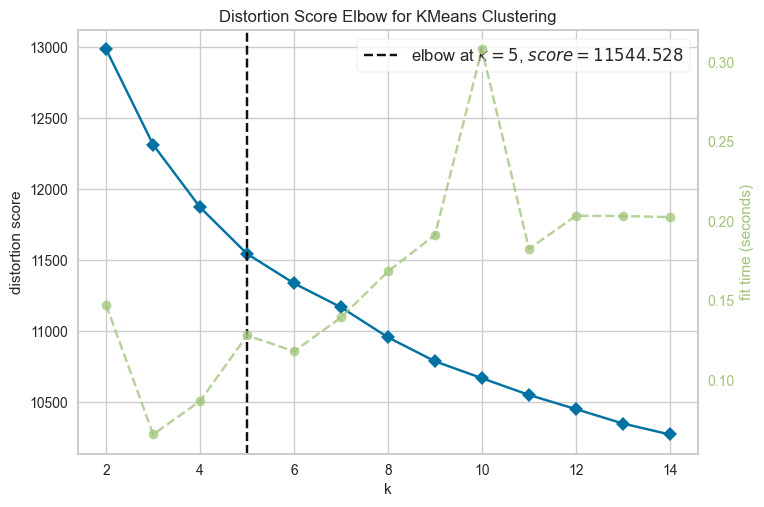

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups

In [16]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop("country", axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [17]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model["Clusters"] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,0
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,0


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [18]:
df_model.Clusters.value_counts()


4    227177
1    212929
0    209726
3    200671
2    162978
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [19]:
pd.options.display.max_columns = 150
df_model.groupby("Clusters").mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.477814,1.937423,4.340950,2.213440,4.268260,1.662693,3.892236,2.803491,3.748910,2.508664,2.324767,3.819822,3.156013,3.281644,2.116376,1.902468,2.113357,1.679167,2.119427,1.719820,1.894090,4.432927,1.833869,4.246736,1.856813,3.846276,1.587128,4.097246,4.099854,4.194983,3.714160,2.583619,4.190000,1.900437,3.136912,2.284371,3.868137,1.937037,3.578698,3.874212,3.886056,1.754122,4.083852,1.794627,4.158965,1.653867,4.314234,3.236828,4.095324,4.296444
1,2.120017,3.312635,3.094524,3.665377,2.953759,2.711176,2.201504,4.004847,2.323624,4.135740,3.479789,3.096746,4.138093,2.617995,2.805691,2.764884,2.847602,2.407464,2.951979,2.692235,1.886836,3.934894,1.687520,4.348731,1.990541,4.138347,2.018335,3.979674,4.168775,3.719080,3.832404,2.234308,4.296240,2.017616,3.233421,2.079529,4.159640,2.016414,3.825299,3.888075,3.574835,2.132692,3.891908,2.060377,3.728496,1.966289,4.012281,2.983741,4.263196,3.814995
2,2.195793,3.278400,2.794365,3.396109,2.590276,2.756427,2.125502,3.516696,2.656009,3.779013,2.341813,3.619489,2.984961,2.919173,2.324351,2.015364,2.307048,1.927475,2.586288,2.245487,3.037600,2.923916,2.587674,2.756937,3.160218,2.634257,3.008658,2.839745,2.588810,2.972966,3.135865,2.836978,3.661132,2.415860,2.362374,2.748911,3.369252,2.519812,2.760728,3.334106,3.535809,1.977028,3.614433,2.059149,3.622520,2.042484,3.882990,3.112788,3.691590,3.667434
3,1.807376,3.628621,2.231503,4.055205,2.282741,3.194328,1.741746,4.069592,2.174290,4.475211,4.251118,2.458327,4.504512,2.145636,3.557814,3.859457,3.988857,3.759352,4.006513,3.931081,2.497421,3.331911,2.601058,3.807242,2.583243,3.824937,2.740446,3.409860,3.648195,3.046778,2.810690,3.348835,3.814886,3.470462,2.098714,3.492533,3.564461,3.039881,2.783795,3.310962,3.500292,2.382756,4.061529,2.138306,3.433112,2.087616,3.678369,3.177245,4.276906,3.721684
4,3.444195,1.920674,3.786330,2.513318,4.035664,1.836484,3.645290,2.774590,3.757035,3.009583,3.816496,2.922928,4.247279,2.410667,3.289814,3.472081,3.809840,3.461332,3.660375,3.178610,2.159105,4.270102,2.653424,4.184024,2.001774,4.000453,1.859717,3.897309,4.132020,3.843439,2.959666,3.599902,3.843263,3.234632,2.239166,3.518177,3.462855,2.827020,2.950285,3.480911,3.737324,2.119788,4.246411,1.967946,3.955299,1.773159,3.961044,3.373053,4.190605,4.198735


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [20]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums["extroversion"] = df_model[ext].sum(axis=1) / 10
data_sums["neurotic"] = df_model[est].sum(axis=1) / 10
data_sums["agreeable"] = df_model[agr].sum(axis=1) / 10
data_sums["conscientious"] = df_model[csn].sum(axis=1) / 10
data_sums["open"] = df_model[opn].sum(axis=1) / 10
data_sums["clusters"] = predictions
data_sums.groupby("clusters").mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.085388,2.423286,3.208992,3.106758,3.327432
1,3.052320,2.980248,3.187273,3.158295,3.242881
2,2.908859,2.527145,2.851078,2.914502,3.120622
3,2.966061,3.646267,3.149109,3.173522,3.245781
4,3.072316,3.426942,3.300137,3.211588,3.352336


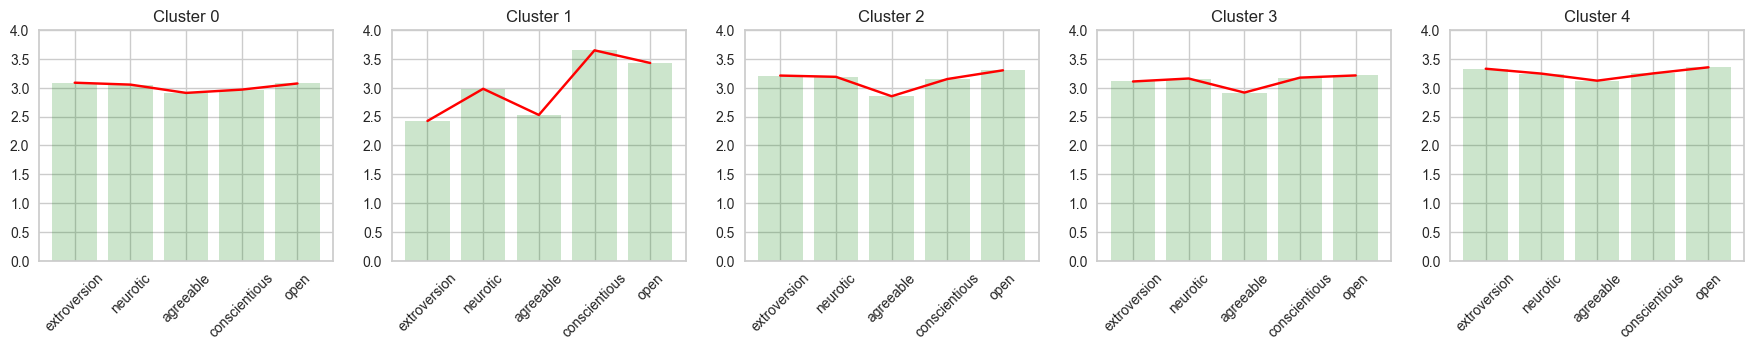

In [21]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby("clusters").mean()
plt.figure(figsize=(22, 3))
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color="green", alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color="red")
    plt.title("Cluster " + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

## Visualizing the Cluster Predictions

In [22]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=["PCA1", "PCA2"])
df_pca["Clusters"] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.459733,-2.197064,0
1,-0.538905,3.477036,1
2,-1.195807,2.307803,1
3,1.111010,0.299307,2
4,-5.516993,2.335765,0


Text(0.5, 1.0, 'Personality Clusters after PCA')

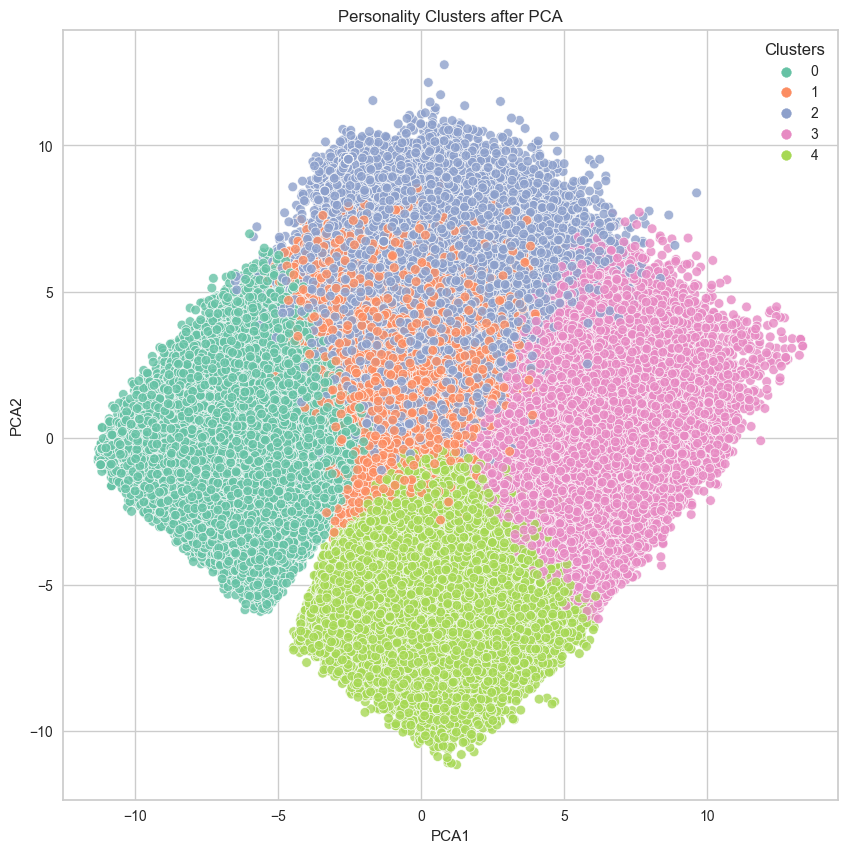

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df_pca, x="PCA1", y="PCA2", hue="Clusters", palette="Set2", alpha=0.8
)
plt.title("Personality Clusters after PCA")


## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [24]:
# Load the CSV file, specifying the tab ('\t') as the delimiter
df = pd.read_csv("test.csv", sep="\t")

# Remove columns 51 and above
df_filtered = df[df.columns[:50]]

# Save the filtered DataFrame to a new CSV file with a comma delimiter
df_filtered.to_csv("cleaned-testdata.csv", sep=",",
                   encoding="utf-8", index=False)

# Load the cleaned data from the new CSV file
my_data = pd.read_csv("cleaned-testdata.csv")

# Print the shape of my_data
print(my_data.shape)
print(my_data)


(1, 50)
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0     3     5     3     4     3     3     2     5     1      5     2     3   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0     4     1     3     1     2     1     3      1     1     4     1     5   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0     1     5     3     4     5      3     3     2     5     3     3     1   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0     3     3     5      3     1     2     4     2     3     1     4     2   

   OPN9  OPN10  
0     5      3  


In [25]:
my_personality = k_fit.predict(my_data[0:50])
print("My Personality Cluster: ", my_personality)

My Personality Cluster:  [1]


In [26]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums["extroversion"] = my_data[ext].sum(axis=1) / 10
my_sums["neurotic"] = my_data[est].sum(axis=1) / 10
my_sums["agreeable"] = my_data[agr].sum(axis=1) / 10
my_sums["conscientious"] = my_data[csn].sum(axis=1) / 10
my_sums["open"] = my_data[opn].sum(axis=1) / 10
my_sums["cluster"] = my_personality
print("Sum of my question groups")
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.4,2.1,3.2,3.1,2.7,1


(0.0, 4.0)

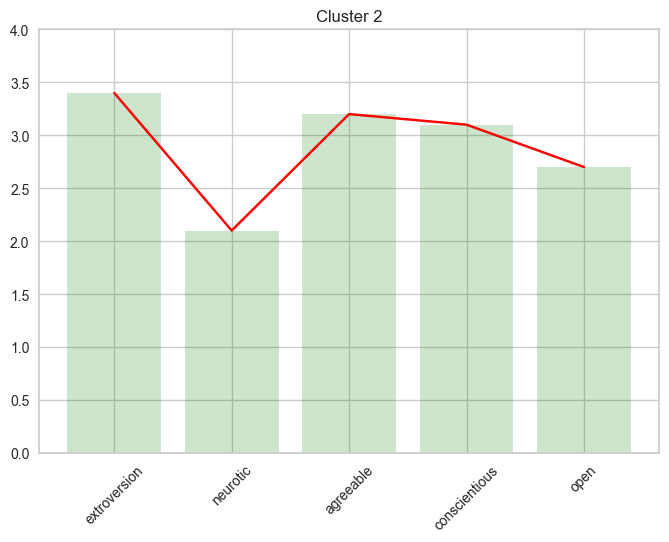

In [27]:
my_sum = my_sums.drop("cluster", axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0, :], color="green", alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0, :], color="red")
plt.title("Cluster 2")
plt.xticks(rotation=45)
plt.ylim(0, 4)

In [28]:
import joblib

# Save the trained KMeans model to a file
joblib.dump(k_fit, "personality_kmeans_model.pkl")

['personality_kmeans_model.pkl']

You can fork my notebook and put your answers in order to see your personality too. 

Don't forget to upvote if you liked my work.